In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ads = pd.read_csv("https://s3.amazonaws.com/thinkific/file_uploads/287654/attachments/2e3/a35/b45/Social_Network_Ads.csv")

In [4]:
ads.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
ads.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
ads.describe(exclude='int64')

,Gender
count,400
unique,2
top,Female
freq,204


In [8]:
ads.drop('User ID',inplace = True,axis=1)

In [9]:
ads=pd.get_dummies(ads,drop_first=True)

In [11]:
cols = ['Age','EstimatedSalary','Gender_Male','Purchased']
ads= ads[cols]

In [12]:
ads.head()

,Age,EstimatedSalary,Gender_Male,Purchased
0,19,19000,1,0
1,35,20000,1,0
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,1,0


In [13]:
X = ads.iloc[:,:-1]
X

,Age,EstimatedSalary,Gender_Male
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1
...,...,...,...
395,46,41000,0
396,51,23000,1
397,50,20000,0
398,36,33000,1


In [15]:
Y = ads.iloc[:,-1].values
Y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [16]:
#Splitting the data in train and test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [17]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
X_train

array([[ 0.02613422, -0.27350719,  1.03823026],
       [ 0.21838597,  0.13588547, -0.96317747],
       [-0.2622434 ,  0.77921679, -0.96317747],
       [-0.2622434 , -0.68289985, -0.96317747],
       [-0.16611752,  0.83770145,  1.03823026],
       [-0.74287276,  0.48679346,  1.03823026],
       [ 0.12226009,  1.51027511,  1.03823026],
       [ 0.98739295,  1.97815243, -0.96317747],
       [-0.93512451,  0.54527813,  1.03823026],
       [-0.2622434 ,  0.13588547,  1.03823026],
       [ 0.89126708, -1.47244284,  1.03823026],
       [-0.83899864,  0.28209713,  1.03823026],
       [ 0.02613422,  0.01891613,  1.03823026],
       [ 0.12226009,  1.04239778,  1.03823026],
       [ 0.79514121,  0.74997446, -0.96317747],
       [ 1.08351883,  0.10664313,  1.03823026],
       [ 1.08351883,  2.06587943, -0.96317747],
       [ 0.79514121, -1.41395818, -0.96317747],
       [-0.93512451,  0.39906646, -0.96317747],
       [-0.64674689, -1.6186545 , -0.96317747],
       [-0.2622434 ,  0.60376279,  1.038

In [19]:
X_test

array([[ 1.1796447 , -1.47244284, -0.96317747],
       [-1.03125038,  0.39906646, -0.96317747],
       [-1.51187975, -0.21502253, -0.96317747],
       [-0.45449514, -0.79986919,  1.03823026],
       [-1.60800562, -0.06881086, -0.96317747],
       [-1.12737626,  0.45755113,  1.03823026],
       [ 1.1796447 , -1.00456552, -0.96317747],
       [ 0.21838597, -0.39047653,  1.03823026],
       [-0.64674689,  0.10664313,  1.03823026],
       [-1.03125038,  0.51603579,  1.03823026],
       [-1.7041315 ,  0.3405818 , -0.96317747],
       [ 0.98739295,  1.42254811, -0.96317747],
       [-1.03125038,  0.57452046,  1.03823026],
       [-1.89638324,  0.3405818 ,  1.03823026],
       [-1.7041315 ,  0.10664313,  1.03823026],
       [-0.2622434 , -0.27350719,  1.03823026],
       [-1.41575388, -0.65365752, -0.96317747],
       [ 0.89126708,  1.01315545,  1.03823026],
       [-0.06999165,  0.04815847,  1.03823026],
       [-0.55062102,  1.36406344, -0.96317747],
       [ 0.89126708,  1.07164012, -0.963

In [20]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)#k=5 default
classifier.fit(X_train ,Y_train)

KNeighborsClassifier()

In [21]:
Y_pred = classifier.predict(X_test)

In [22]:
Y_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [23]:
Y_test

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(Y_test,Y_pred))

[[50  2]
 [ 1 27]]


In [27]:
from sklearn.metrics import roc_auc_score,roc_curve,auc,accuracy_score
print("ACCURACY:",accuracy_score(Y_test,Y_pred))

ACCURACY: 0.9625


In [28]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        52
           1       0.93      0.96      0.95        28

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



In [31]:
error = []
accuracy= []
#calculating error for k values between 1 and 40

for i in range(    1 ,40,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))
    accuracy.append(accuracy_score(Y_test , pred_i))

Text(0, 0.5, 'Mean Error')

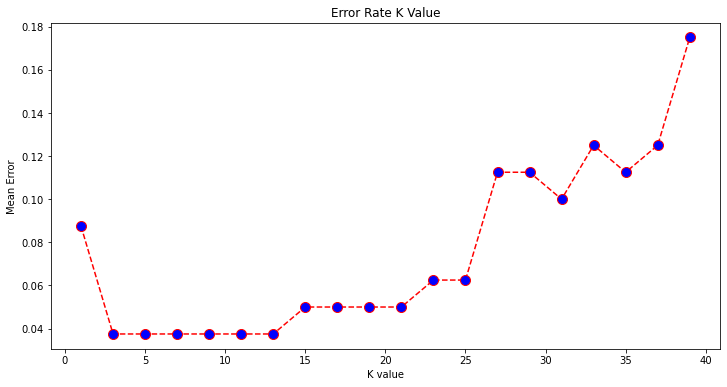

In [32]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40,2),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K value')
plt.ylabel('Mean Error')

Text(0, 0.5, 'Mean Error')

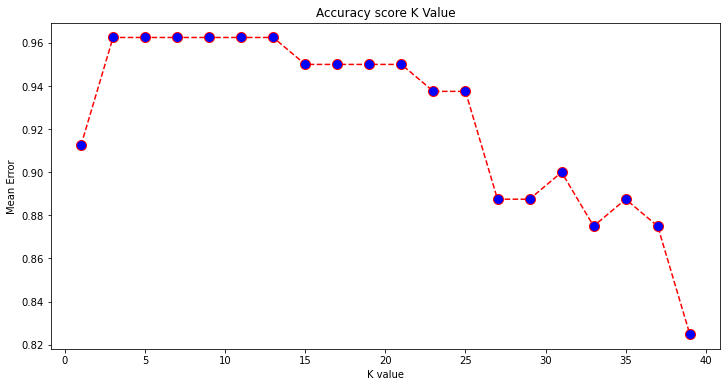

In [33]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40,2),accuracy,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Accuracy score K Value')
plt.xlabel('K value')
plt.ylabel('Mean Error')

In [34]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=19) #as n =59
classifier.fit(X_train ,Y_train)

KNeighborsClassifier(n_neighbors=19)

In [35]:
Y_pred1 = classifier.predict(X_test)

In [36]:
print(confusion_matrix(Y_test,Y_pred1))

[[50  2]
 [ 2 26]]


In [38]:
print("Accuracy is: ",accuracy_score(Y_test , Y_pred1))

Accuracy is:  0.95
